In [76]:
#Importing libraries
import pandas as pd
import numpy as np
import random as rnd
import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# machine learning
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

from sklearn import linear_model
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
#Reading data from file
df_data = pd.read_csv('customer_churn.csv')

In [3]:
#Renaming the columns
df_data.columns = ['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan', 'VMail_Plan', 'VMail_Message', 'Day_Mins',
                  'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
                  'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn']

In [4]:
df_data.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Half of the clients remain in the company for more than 101 months

The average total revenue generated per customer(Day + Night + Eve + Intl Charge) is 67.49

Each customer had an average 305 calls (Day + Night + Eve + Intl Calls) in the course of using the service of this company

Half of the clients has called the customer service at least one time

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account_Length    3333 non-null int64
Area_Code         3333 non-null int64
Phone             3333 non-null object
Intl_Plan         3333 non-null object
VMail_Plan        3333 non-null object
VMail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Mins          3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Mins        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Mins         3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


#### We can see that there are no missing values. 

In [6]:
df_data.describe(include=['O'])

,State,Phone,Intl_Plan,VMail_Plan,Churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,411-1715,no,no,False.
freq,106,1,3010,2411,2850


####  We can drop the phone number and area code columns as they contain each customer's unique phone number and it's not going to be useful in the analysis. 
#### We can see that most of the customers don't have International Plan or Vmail Plan
#### Also we can see that the dataset is imbalanced as the no. of churned customers is far less than loyal customers

In [7]:
df_data = df_data.drop(['Area_Code','Phone'],axis=1)

#### n the given dataset, we have two types of customers one who is likely to be loyal and another who is likely to be disloyal . So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [8]:
df_data.groupby('Churn').mean()

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
Churn,,,,,,,,,,,,,,,
False.,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True.,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [9]:
df_data.groupby('Churn').size()

Churn
False.    2850
True.      483
dtype: int64

([<matplotlib.patches.Wedge at 0x2ed5771df98>,
 [Text(0.5276375525199629, 1.0777748434486414, 'False.'),
  Text(-0.48366780272639004, -0.987960250519132, 'True.')],
 [Text(0.30778857230331164, 0.6287019920117075, '85.5%'),
  Text(-0.2638188014871218, -0.538887409374072, '14.5%')])

Text(0.5, 1.0, 'Percent of churn in customer')

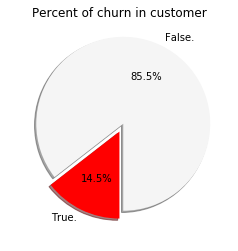

In [10]:
labels = df_data['Churn'].value_counts(sort = True).index
sizes = df_data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 4,4
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

#### The class for churn is only around 15% of the total population of samples. As observed earlier the dataset is imbalanced hence there is a real risk that a model trained on this data may only make too many predictions in favour of the majority class.

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Total account length by customers in each state')

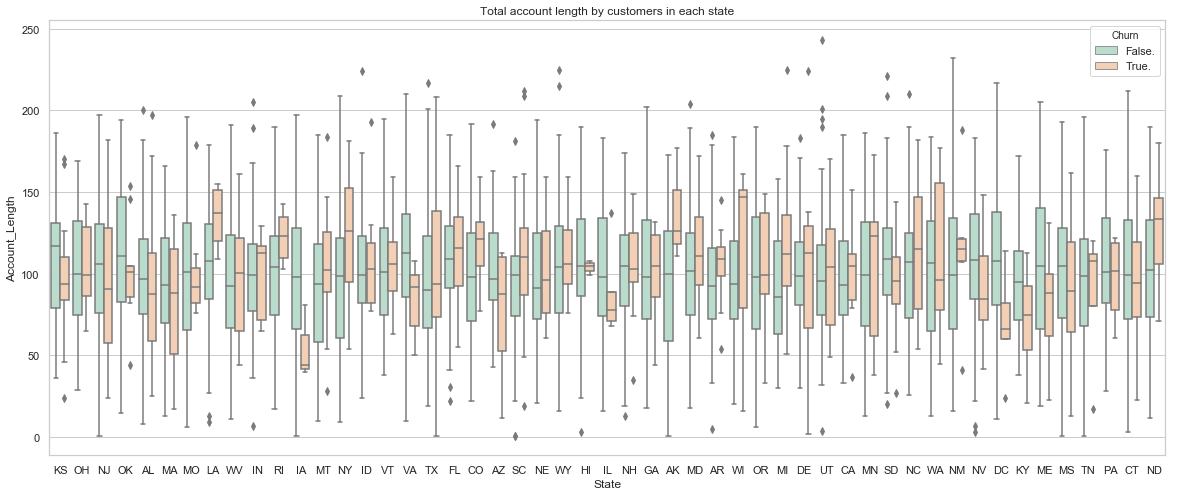

In [11]:
# Account length in each state analysis
plt.figure(figsize = (20,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = df_data.State, y = df_data.Account_Length, hue = df_data.Churn,palette = "Pastel2")

plt.title('Total account length by customers in each state')

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Total customers in each state')

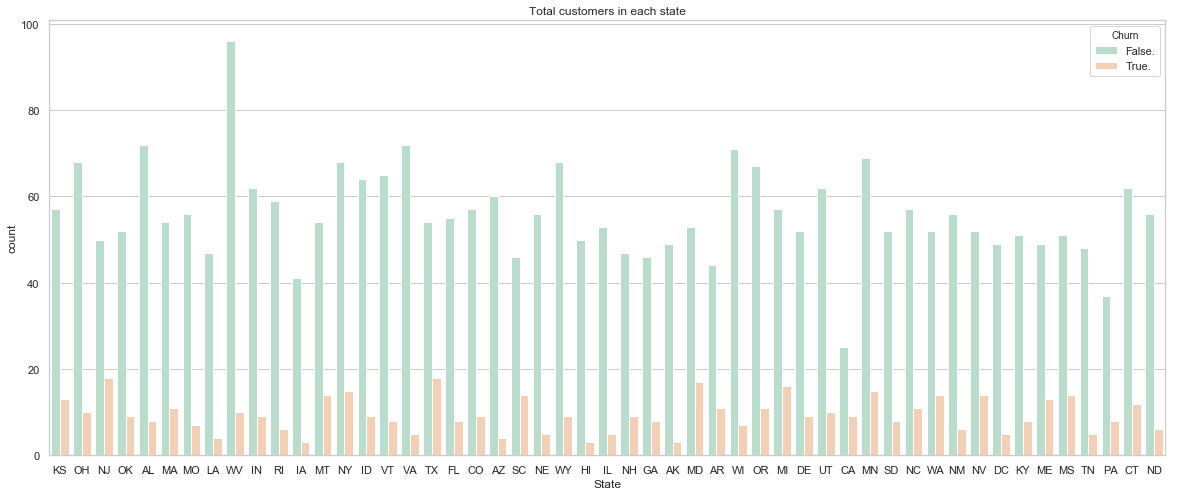

In [12]:
# Churn data for each state
plt.figure(figsize = (20,8))
sns.set(style = 'whitegrid')
sns.countplot(df_data.State, hue = df_data.Churn,palette = "Pastel2" )
plt.title('Total customers in each state')

#### There is no evident relationship between different states and the customer's leave. We can drop this column too.

In [13]:
df_data = df_data.drop(['State'],axis=1)

#### Converting categorical data

In [14]:
df_data.replace({'Churn': {'False.': 0, 'True.': 1}}, inplace=True)
df_data.replace({'Intl_Plan': {'no': 0, 'yes': 1}}, inplace=True)
df_data.replace({'VMail_Plan': {'no': 0, 'yes': 1}}, inplace=True)

In [ ]:
# df_data.replace({'State': {'AK':1, 'AL':2, 'AR':3, 'AZ':4, 'CA':5, 'CO':6, 'CT':7, 'DC':8, 'DE':9, 'FL':10, 'GA':11, 'HI':12,
#                          'IA':13, 'ID':14, 'IL':15, 'IN':16, 'KS':17, 'KY':18, 'LA':19, 'MA':20, 'MD':21, 'ME':22, 'MI':23, 
#                          'MN':24, 'MO':25, 'MS':26, 'MT':27, 'NC':28, 'ND':29, 'NE':30, 'NH':31, 'NJ':32, 'NM':33, 'NV':34,
#                          'NY':35, 'OH':36, 'OK':37, 'OR':38, 'PA':39, 'RI':40, 'SC':41, 'SD':42, 'TN':43, 'TX':44, 'UT':45,
#                          'VA':46, 'VT':47, 'WA':48, 'WI':49, 'WV':50, 'WY':51}}, inplace=True)

In [15]:
df_data.head()

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [17]:
df_data['Day_rate'] = df_data.Day_Charge /  df_data.Day_Mins
df_data['Eve_rate'] = df_data.Eve_Charge / df_data.Eve_Mins 
df_data['Night_rate'] = df_data.Night_Charge / df_data.Night_Mins 
df_data['Intl_rate'] = df_data.Intl_Charge / df_data.Intl_Mins 

Text(0.5, 1.0, 'Different calls rate data')

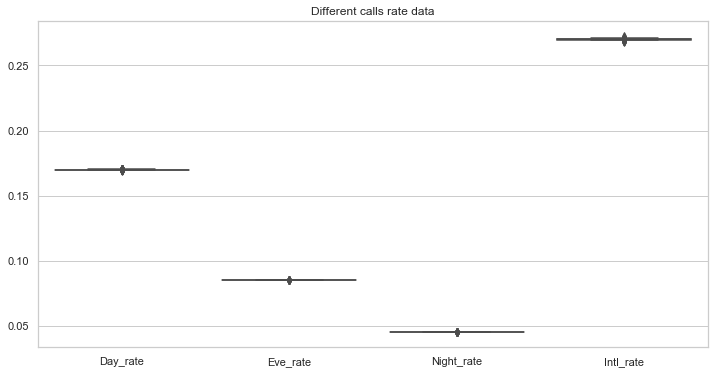

In [18]:
features=[ 'Day_rate','Eve_rate','Night_rate', 'Intl_rate']
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_data[features], ax=ax);
plt.title('Different calls rate data')

In [26]:
df_rate = df_data[features]
df_rate.describe()

,Day_rate,Eve_rate,Night_rate,Intl_rate
count,3331.000000,3332.000000,3333.000000,3315.000000
mean,0.170003,0.085001,0.045000,0.270057
std,0.000028,0.000016,0.000017,0.000329
min,0.169231,0.084936,0.044828,0.268182
25%,0.169989,0.084988,0.044988,0.269811
50%,0.170004,0.085000,0.045000,0.270000
75%,0.170017,0.085013,0.045013,0.270297
max,0.170513,0.085075,0.045111,0.272727


#### We can make following observations:
    - The variation between min amd max values (std) for each category of rate is very less. So we can assume that the rates are almost constant.
    - The rates are Day - 0.170, Eve - 0.085, Night - 0.045, Intl - 0.27. 
    - International calls have highest rate, followed by Day calls, followed by Evening calls. Night calls have the lowest rate. So the higher Call mins for Day and/or Intl calls will result in higher charges.

In [27]:
df_data = df_data.drop(columns=[ 'Day_rate','Eve_rate','Night_rate', 'Intl_rate'])

<Figure size 648x648 with 0 Axes>

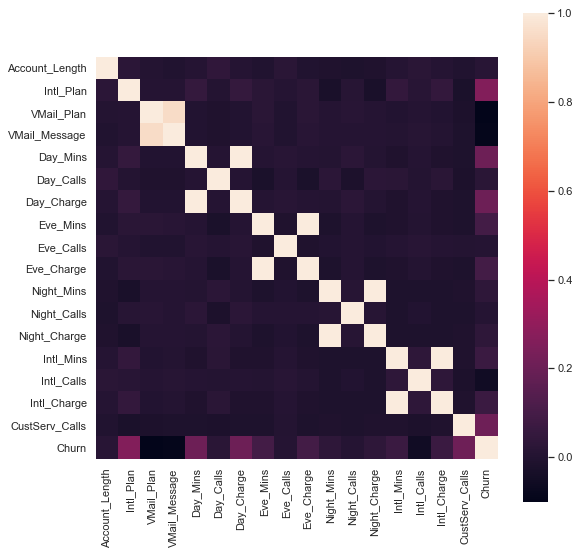

In [16]:
## Check overall correlation
cor = df_data.corr()
plt.figure(figsize = (9,9))
sns.heatmap(cor, square = True) 
## Similar as common sense, call minutes has correlation with charge

#### From the colored correlation matrix generated above, we can see that the 4 variables  'Day Charge','Night Charge','Eve Charge' and 'Intl charge' that have been calculated directly from the number of minutes spent on phone calls (Day Mins,night mins,evening minutes, international minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. We can drop them from our analysis.
#### Also Vmail Plan and Vmail messages are also corelated to each other and one of them can be dropped.

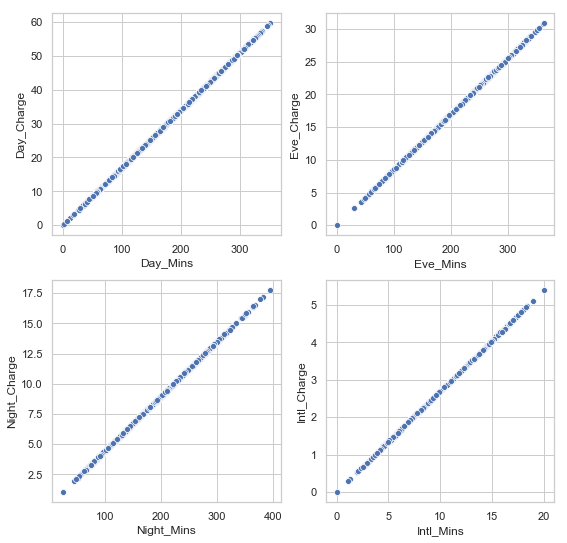

In [28]:
## To double check, scatterplot the minutes and the charge
f, ([(ax1, ax2), (ax3, ax4)]) = plt.subplots(2,2, figsize=(9,9))
sns.scatterplot(df_data['Day_Mins'], df_data['Day_Charge'], ax=ax1)
sns.scatterplot(df_data['Eve_Mins'], df_data['Eve_Charge'], ax=ax2)
sns.scatterplot(df_data['Night_Mins'], df_data['Night_Charge'], ax=ax3)
sns.scatterplot(df_data['Intl_Mins'], df_data['Intl_Charge'], ax=ax4)
## They are highly correlated

#### As from above scatter plot it is confirmed that the Charge is related to respective Mins. So we will drop the columns Day_Charge, Night_Charge, Eve_Charge, Intl_Charge

In [29]:
df_data = df_data.drop(columns=['Day_Charge', 'Eve_Charge','Night_Charge', 'Intl_Charge'])

In [34]:
df_data[(df_data.VMail_Plan == 0) & (df_data.VMail_Message > 0)].count()

Account_Length    0
Intl_Plan         0
VMail_Plan        0
VMail_Message     0
Day_Mins          0
Day_Calls         0
Eve_Mins          0
Eve_Calls         0
Night_Mins        0
Night_Calls       0
Intl_Mins         0
Intl_Calls        0
CustServ_Calls    0
Churn             0
dtype: int64

#### We can see that VMail Message is greater than 0 only if Vmail Plan is True. Hence we can drop Vmail Plan.

In [36]:
df_data = df_data.drop(columns=['VMail_Plan'])

<Figure size 576x576 with 0 Axes>

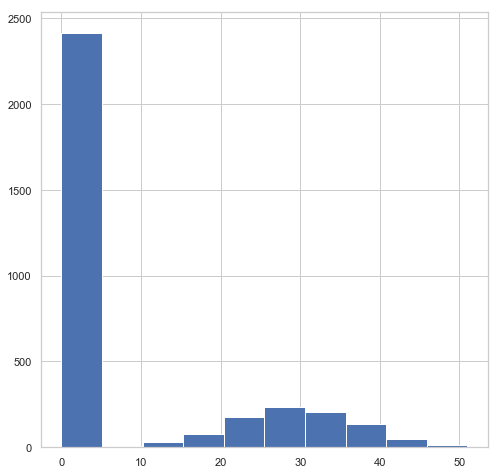

In [37]:
plt.figure(figsize = (8,8))
df_data['VMail_Message'].hist()

Most of the customers dont have Vmail Plan hence the high peak for 0 Vmail messages. We will analyse the customers having Vmail Plan.

(1, 50)

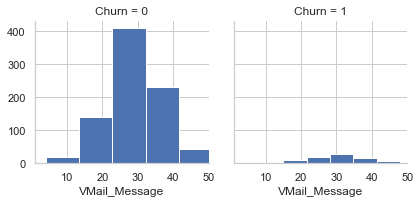

In [45]:
g = sns.FacetGrid(df_data[df_data.VMail_Message > 0], col='Churn')
g.map(plt.hist, 'VMail_Message', bins=5)
plt.xlim(xmin=1, xmax = 50)

In [ ]:
#df_data = df_data.drop(columns=['VMail_Message'])

In [51]:
df_data[['Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Churn']].groupby('Churn').mean()

,Day_Calls,Eve_Calls,Night_Calls,Intl_Calls
Churn,,,,
0,100.283158,100.038596,100.058246,4.532982
1,101.335404,100.561077,100.399586,4.163561


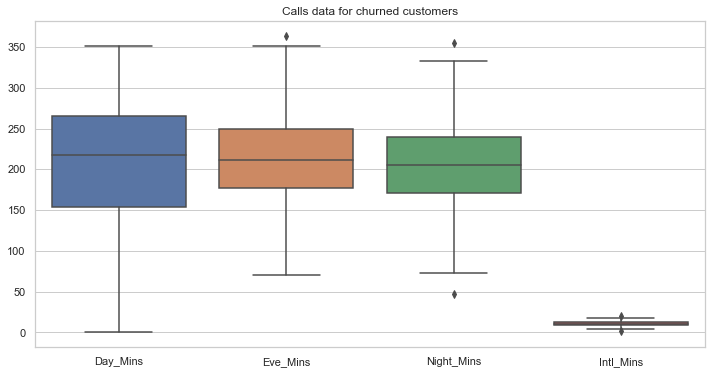

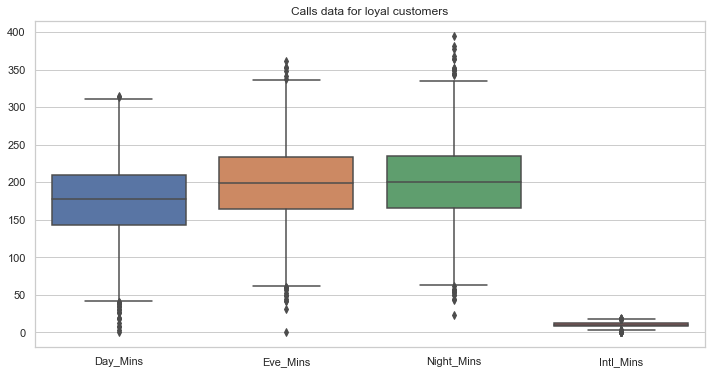

In [58]:
df_churn = df_data[df_data.Churn == 1]
df_nochurn = df_data[df_data.Churn == 0]
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_churn[features], ax=ax)
plt.title('Calls data for churned customers');
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_nochurn[features], ax=ax)
plt.title('Calls data for loyal customers');

#### So we can see above that the mean number of calls for all the times i.e Day, Evening, Night, International is almost same for Churned and loyal customers. Also logically we know that one call can last any number of minutes. Since we already have the total minutes  in every category we will drop the columns Day_Calls, Night_Calls, Eve_Calls and Intl_Calls

In [52]:
df_data = df_data.drop(columns=['Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls'])

Text(0.5, 1.0, 'Total call minutes data')

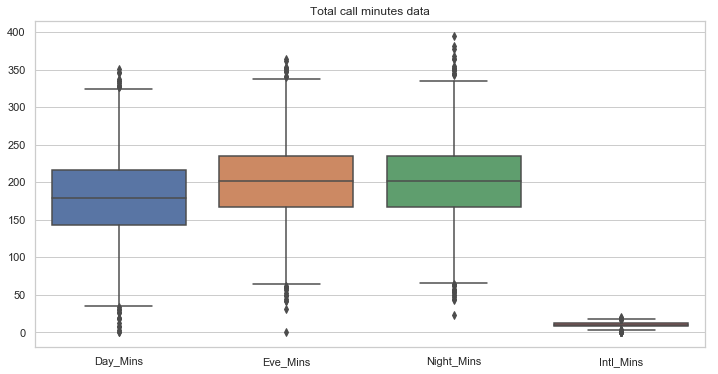

In [54]:
features=[ 'Day_Mins','Eve_Mins','Night_Mins', 'Intl_Mins']
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_data[features], ax=ax);
plt.title('Total call minutes data')

As we can see that the outliers are not that far away from the min/max values. Hence we decide not to drop the outliers.

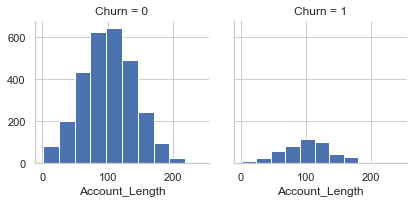

In [61]:
g = sns.FacetGrid(df_data, col='Churn')
g.map(plt.hist, 'Account_Length', bins=10)

We can see that the distribution of the Account Length of customers that left or were loyal are somehow similar. The frequency of the customers who left are less than loyal customers and that's the reason why the bins are shorter in right histogram above. Most of the customers stayed with the company between 50 to 150 months.

,Account_Length,Intl_Plan,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn
Account_Length,1.000000,0.024735,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541
Intl_Plan,0.024735,1.000000,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852
VMail_Message,-0.004628,0.008745,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728
Day_Mins,0.006216,0.049396,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151
Eve_Mins,-0.006757,0.019100,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796
Night_Mins,-0.008955,-0.028905,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493
Intl_Mins,0.009514,0.045871,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239
CustServ_Calls,-0.003796,-0.024522,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750
Churn,0.016541,0.259852,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000


<Figure size 648x648 with 0 Axes>

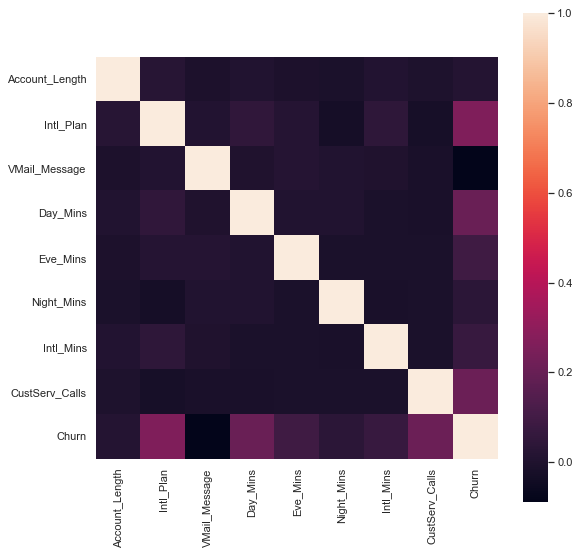

In [62]:
# Lets check corelation one more time
cor = df_data.corr()
cor
plt.figure(figsize = (9,9))
sns.heatmap(cor, square = True) 

In [63]:
# Lets check if Intl_Plan and Intl_Mins are related
df_data[(df_data.Intl_Plan == 0) & (df_data.Intl_Mins > 0)].count()

Account_Length    2992
Intl_Plan         2992
VMail_Message     2992
Day_Mins          2992
Eve_Mins          2992
Night_Mins        2992
Intl_Mins         2992
CustServ_Calls    2992
Churn             2992
dtype: int64

#### So even though if the customer doesn't have International plan he may have International call minutes

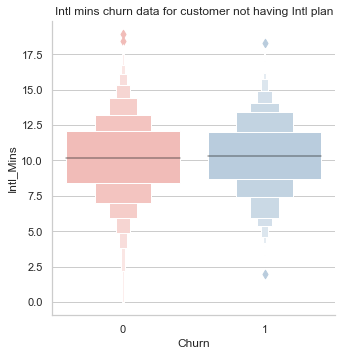

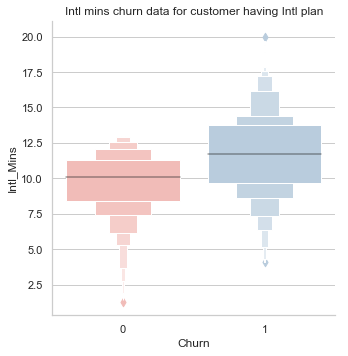

In [64]:
g = sns.factorplot(x="Churn", y = "Intl_Mins",data = df_data[df_data.Intl_Plan == 0], kind="boxen", palette = "Pastel1")
plt.title('Intl mins churn data for customer not having Intl plan');
g = sns.factorplot(x="Churn", y = "Intl_Mins",data = df_data[df_data.Intl_Plan == 1], kind="boxen", palette = "Pastel1")
plt.title('Intl mins churn data for customer having Intl plan');

For Customers having the International plan, people who have left have talked more. Since the International rate is higher their cost is higher.

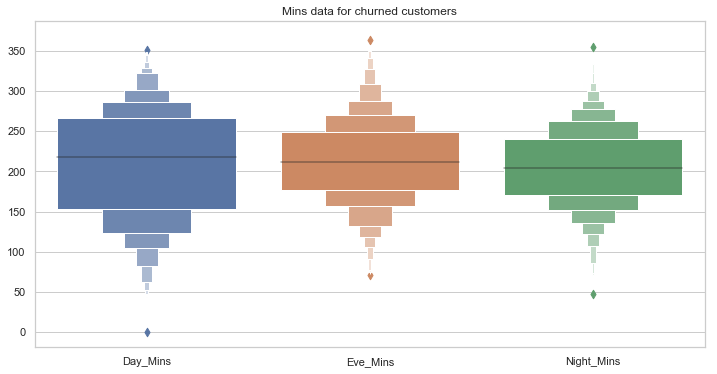

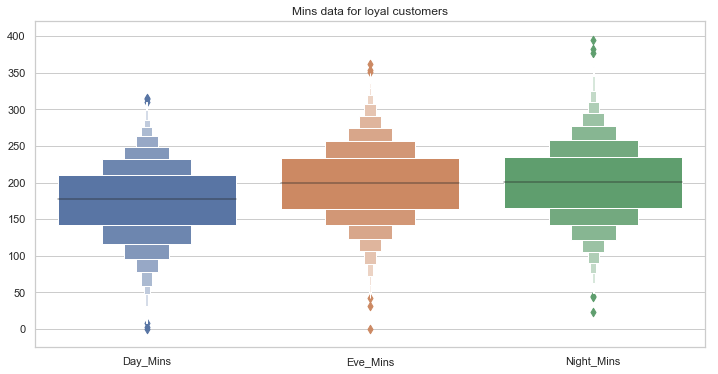

In [65]:
features=[ 'Day_Mins','Eve_Mins','Night_Mins']
df_churn = df_data[df_data.Churn == 1]
df_nochurn = df_data[df_data.Churn == 0]
_, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=df_churn[features], ax=ax)
plt.title('Mins data for churned customers');
_, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=df_nochurn[features], ax=ax)
plt.title('Mins data for loyal customers');

The customers who left, talked more during the day and evening when the call rate is higher. Night call mins are almost same for both churned and not churned customers.

<Figure size 432x432 with 0 Axes>

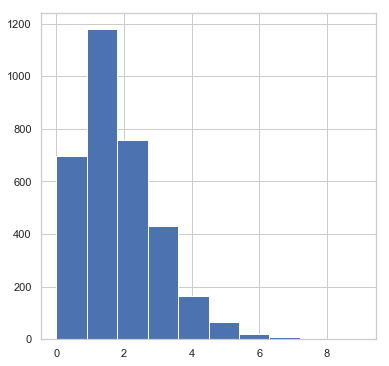

In [66]:
plt.figure(figsize = (6,6))
df_data['CustServ_Calls'].hist()

In [73]:
pd.crosstab(df_data.Churn, df_data.CustServ_Calls)


CustServ_Calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


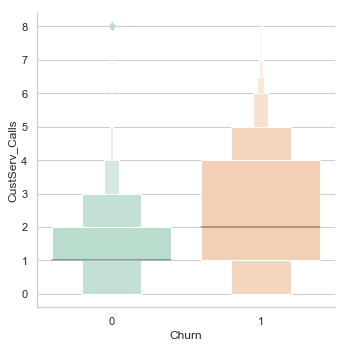

In [68]:
g = sns.factorplot(y="CustServ_Calls",x="Churn",data=df_data,kind="boxen", palette = "Pastel2")

Most of the customers had at least one call to customer service

Most of the customers who escaped had at leat one to four call to customer service.

So we can see that there is clearly an influence here.

In [74]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 9 columns):
Account_Length    3333 non-null int64
Intl_Plan         3333 non-null int64
VMail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null int64
dtypes: float64(4), int64(5)
memory usage: 234.4 KB


In [80]:
#Splitting the data into train and test set

array = df_data.values
X = array[:,0:8]     # Features/Independent Variables
Y = array[:,8]       # Response/Class Variable
scoring = 'accuracy'
seed = 7
# One-third of data as a part of test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=seed)

train_size = len(X_train)
val_size = len(X_test)
print(val_size)
print(train_size)

1000
2333


### Gaussian Naive Bayes model

In [178]:
clf = GaussianNB()
# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set for the gaussian classifier
clf.fit(X_train, Y_train) 

#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#Model Performance
#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)

#Predicting for the Test(Validation) Set
pred_clf = clf.predict(X_test)

print("NB Accuracy :", clf.score(X_test, Y_test))

GaussianNB(priors=None, var_smoothing=1e-09)

NB accuracy: 0.849965 (0.016842)
NB Accuracy : 0.845


In [94]:
# Classification report showing other metrics
from sklearn.metrics import classification_report
target_names = ['No Churn', 'Churn']
print(classification_report(Y_test, pred_clf, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.89      0.93      0.91       847
       Churn       0.49      0.38      0.43       153

   micro avg       0.84      0.84      0.84      1000
   macro avg       0.69      0.65      0.67      1000
weighted avg       0.83      0.84      0.84      1000



[Text(0, 0.5, 'No churn'), Text(0, 1.5, 'Churn')]

[Text(0.5, 0, 'No churn'), Text(1.5, 0, 'Churn')]

Text(30.5, 0.5, 'True label')

Text(0.5, 12.5, 'Predicted label')

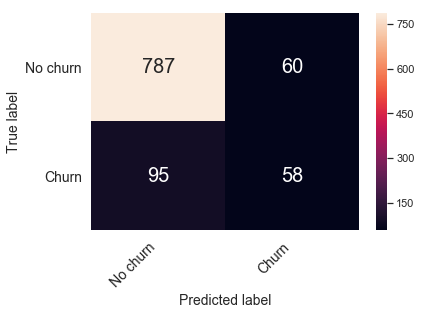

In [189]:
# Confusion matrix
cm_nb = confusion_matrix(Y_test, pred_clf)
confusion_matrix_df = pd.DataFrame(cm_nb, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

### Decision Tree model

In [185]:
from sklearn import tree
import graphviz

decisiontree = tree.DecisionTreeClassifier()

#Fitting the training set for Decision tree
decisiontree.fit(X_train, Y_train) 

scoring2 = 'precision'
scoring3 = 'recall'
scoring4 = 'f1-Score'
#calling the cross validation function
cv_results = model_selection.cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=kfold, scoring=scoring)

#Model Performance
#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('Decision tree model accuracy', cv_results.mean(), cv_results.std())
print(msg)

#Predicting for the Test(Validation) Set
pred_tree = decisiontree.predict(X_test)

print("Decision Tree Accuracy :", decisiontree.score(X_test, Y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision tree model accuracy: 0.888544 (0.021512)
Decision Tree Accuracy : 0.896


In [203]:
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisiontree, out_file=None, #max_depth=4,
                         feature_names = ['Account_Length','Intl_Plan', 'VMail_Message','Day_Mins', 'Eve_Mins', 'Night_Mins',
                                          'Intl_Mins', 'CustServ_Calls'],
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree1.gv', view=True)


'decision_tree1.gv.pdf'

array([0.05223547, 0.06864364, 0.0717913 , 0.34826961, 0.16528622,
       0.06799838, 0.11782953, 0.10794584])

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 8 artists>

([<matplotlib.axis.YTick at 0x2ed5a6e8cf8>,
 <a list of 8 Text yticklabel objects>)

Text(0.5, 0, 'Relative Importance')

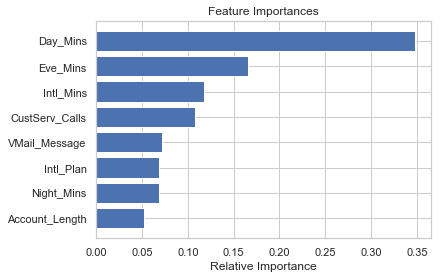

In [174]:
# Plotting the feature importance
decisiontree.feature_importances_
features = df_data.columns[[0,1,2,3,4,5,6,7]]
importances = decisiontree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [186]:
# Classification report showing other metrics
target_names = ['No Churn', 'Churn']
print(classification_report(Y_test, pred_tree, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.95      0.93      0.94       847
       Churn       0.65      0.71      0.68       153

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.80      0.82      0.81      1000
weighted avg       0.90      0.90      0.90      1000



[Text(0, 0.5, 'No churn'), Text(0, 1.5, 'Churn')]

[Text(0.5, 0, 'No churn'), Text(1.5, 0, 'Churn')]

Text(30.5, 0.5, 'True label')

Text(0.5, 12.5, 'Predicted label')

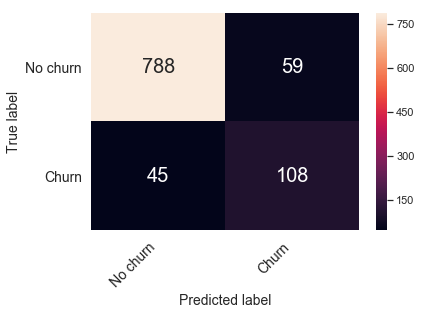

In [188]:
# Confusion matrix
cm_tree = confusion_matrix(Y_test, pred_tree)
confusion_matrix_df = pd.DataFrame(cm_tree, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

### KNN model

In [175]:
#KNN
## Since we have 9 features, start with the odd number closest to the root square of 9: 3
knn3 = KNeighborsClassifier(n_neighbors = 3)

#Fitting the training set for KNN 3
knn3.fit(X_train, Y_train)

#calling the cross validation function
cv_r_knn3 = model_selection.cross_val_score(knn3, X_train, Y_train, cv=kfold, scoring=scoring)

#Model Performance
#displaying the mean and standard deviation of the prediction
msg_knn3 = "%s: %f (%f)" % ('KNN3 model accuracy', cv_r_knn3.mean(), cv_r_knn3.std())
print(msg_knn3)

#Predicting for the Test(Validation) Set
pred_knn3 = knn3.predict(X_test)
print("KNN Accuracy score on test set (N = 3):", knn3.score(X_test, Y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

KNN3 model accuracy: 0.866700 (0.025756)
KNN Accuracy score on test set (N = 3): 0.859


In [176]:
## N = 5
knn5 = KNeighborsClassifier(n_neighbors = 5)

#Fitting the training set for KNN 5
knn5.fit(X_train, Y_train)

#calling the cross validation function
cv_r_knn5 = model_selection.cross_val_score(knn5, X_train, Y_train, cv=kfold, scoring=scoring)

#Model Performance
#displaying the mean and standard deviation of the prediction
msg_knn5 = "%s: %f (%f)" % ('KNN5 model accuracy', cv_r_knn5.mean(), cv_r_knn5.std())
print(msg_knn5)

#Predicting for the Test(Validation) Set
pred_knn5 = knn5.predict(X_test)
print("KNN Accuracy on test set(N = 5):", knn5.score(X_test, Y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNN5 model accuracy: 0.885116 (0.024067)
KNN Accuracy on test set(N = 5): 0.874


In [177]:
## N = 7
knn7 = KNeighborsClassifier(n_neighbors = 7)

#Fitting the training set for KNN 7
knn7.fit(X_train, Y_train)

#calling the cross validation function
cv_r_knn7 = model_selection.cross_val_score(knn7, X_train, Y_train, cv=kfold, scoring=scoring)

#Model performance
#displaying the mean and standard deviation of the prediction
msg_knn7 = "%s: %f (%f)" % ('KNN7 accuracy', cv_r_knn7.mean(), cv_r_knn7.std())
print(msg_knn7)

#Predicting for the Test(Validation) Set
pred_knn7 = knn7.predict(X_test)
print("KNN Accuracy (N = 7):", knn7.score(X_test, Y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

KNN7 accuracy: 0.887260 (0.021405)
KNN Accuracy (N = 7): 0.874


In [93]:
# Classification report showing other metrics

target_names = ['No Churn', 'Churn']
print(classification_report(Y_test, pred_knn7, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.88      0.98      0.93       847
       Churn       0.73      0.28      0.41       153

   micro avg       0.87      0.87      0.87      1000
   macro avg       0.81      0.63      0.67      1000
weighted avg       0.86      0.87      0.85      1000



[Text(0, 0.5, 'No churn'), Text(0, 1.5, 'Churn')]

[Text(0.5, 0, 'No churn'), Text(1.5, 0, 'Churn')]

Text(30.5, 0.5, 'True label')

Text(0.5, 12.5, 'Predicted label')

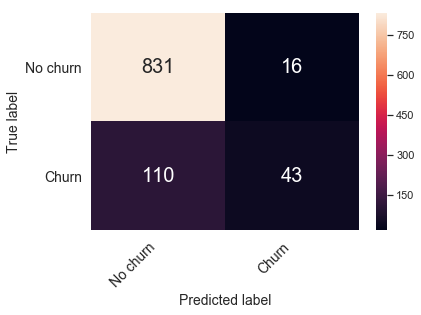

In [190]:
# Confusion matrix
cm_knn = confusion_matrix(Y_test, pred_knn7)
confusion_matrix_df = pd.DataFrame(cm_knn, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

### Summary

The dataset has no null values. Based on our analysis we dropped the following columns:
State, Phone, Area Code, Vmail Plan, Day Calls, Day Charges, Eve Calls, Eve Charges, Night Calls, Night Charges, Intl Calls, Intl Charges.
We did not drop the outliers since mostly they were not that distant.
We see that the call rates are highest for International Calls, then Day Calls, then Evening Calls and lastly Night Calls.

We used Decision Tree, Gaussian NB and Knn7 classification algorithms to predict the whether customer will churn or not. We used kfold=10 for cross validation. The results were as follows:
            Validation | Test     | No Churn   | Churn      | No Churn | Churn  |
   Model  | Accuracy   | Accuracy | Prediction | Prediction | Recall   | Recall |
__________|_________________________________________________________________________
Gaussian  |    0.849   |   0.845  |    0.89    |    0.49    |   0.93   |  0.38  |
NB        |            |          |            |            |          |        |
__________|_________________________________________________________________________
Decision  |    0.888   |   0.896  |    0.95    |    0.65    |   0.93   |  0.71  |
Tree      |            |          |            |            |          |        |
__________|_________________________________________________________________________
Knn7      |    0.887   |   0.874  |    0.88    |    0.73    |   0.98   |  0.28  |
          |            |          |            |            |          |        |
          
From the above table we see that the test accuracy Churn recall is highest for Decision Tree model which is 89.6% and 71% respectively. 

From the feature importance for Decision tree, the Day, Eve and Intl Call Mins have high importance, followed by customer service calls, Vmail message, International Plan, Night call minutes and lastly Account length.

So basically customers having high talk time in the peak hours(high call rate) or having international calls (again high call rate) and customers making more Customer calls are likely to Churn. 

Recommendations: 
Customers having day talktime(>263 mins), evening talktime(>266 mins), International mins(>7 mins) on regular basis and have made more than 3 customers calls should be made eligible for promotions to retain them.